In [3]:
import atlite
import linkingtool.linking_utility as utils
import linkingtool.linking_data as dataprep
import geopandas as gpd
import os
import pandas as pd

In [2]:
config=utils.load_config('config/config_linking_tool.yml')

In [14]:
solar_sites=pd.read_pickle('results/linking/Solar_Top_Sites_Clustered.pkl')
wind_sites=pd.read_pickle('results/linking/Wind_Top_Sites_Clustered.pkl')

In [13]:
wind_sites['clews_investment_capacity_MW']=wind_sites['potential_capacity']/5
solar_sites['clews_investment_capacity_MW']=solar_sites['potential_capacity']/5

solar_sites.to_pickle('results/linking/Solar_Top_Sites_Clustered.pkl')
wind_sites.to_pickle('results/linking/Wind_Top_Sites_Clustered.pkl')

In [15]:
solar_sites

,geometry,p_lcoe,capex,Cluster_No,potential_capacity,Region_ID,Region,nearest_station,nearest_station_distance_km,Site_ID,fom,vom,CF_mean,clews_investment_capacity_MW
cluster_id,,,,,,,,,,,,,,
East Kootenay_1,"MULTIPOLYGON (((-116.0672 49.2332, -116.0683 4...",1377.859218,1.482683,1,5000.0,16,East Kootenay,138_FRO_ISS,0.0,1,0.023766,0,0.235211,1000.0


# test

In [3]:
province_gadm_regions_gdf=gpd.read_file('data/downloaded_data/GADM/BC_gadm_regions.geojson')
current_region=config['regional_info']['region_1']
_CRC_=current_region['code']
cutout_config=config['cutout']

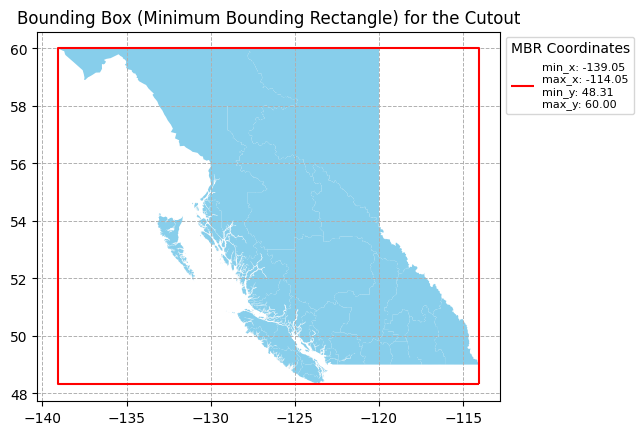

In [4]:
bounding_box_save_to:str=os.path.join(config['cutout']['root'],f"{_CRC_}_MBR.geojson")
bounding_box:dict=dataprep.plot_n_save_bounding_box(province_gadm_regions_gdf,current_region,bounding_box_save_to)

In [7]:
cutout_config = {
    'root': 'data/downloaded_data/cutout',
    'module': ['era5'],
    'dx': 0.25,
    'dy': 0.25,
    'snapshots': {
        'start': ['2023-01-01 07:00:00'],
        'end': ['2023-01-01 11:00:00']
    },
    'snapshots_tz_BC': {
        'start': ['2023-01-01 00:00:00'],
        'end': ['2023-01-01 04:00:00']
    },
    'timezone_convert': 'Etc/GMT+7'
}



In [10]:
def prepare_cutout(module,start_date, end_date,bounding_box,save_to_path):

    min_x,max_x,min_y,max_y=bounding_box.values()

    cutout = atlite.Cutout(
        path=save_to_path,
        module=module,
        x=slice(min_x,max_x), # Longitude
        y=slice(min_y,max_y), # Latitude
        time=slice(start_date,end_date)
    )

    cutout.prepare()
    return True

In [11]:
start_date="2023-01-01"
end_date="2023-01-01"

In [2]:
import atlite

# values are random, any cutout will fail
cutout = atlite.Cutout(
    path='test.nc',
    module=['era5'],
    x=slice(3, 6),
    y=slice(3, 6),
    time="2019-05-02",
    features=['runoff'],
)
cutout.prepare()

/localhome/mei3/miniconda3/envs/linkingtool/lib/python3.12/site-packages/cads_api_client/legacy_api_client.py:97: UserWarning: This is a beta version. The following parameters have not been implemented yet: {'info_callback': <bound method Logger.debug of <Logger atlite.datasets.era5 (WARNING)>>}.
  warnings.warn(
/localhome/mei3/miniconda3/envs/linkingtool/lib/python3.12/site-packages/cads_api_client/legacy_api_client.py:97: UserWarning: This is a beta version. The following parameters have not been implemented yet: {'info_callback': <bound method Logger.debug of <Logger atlite.datasets.era5 (WARNING)>>}.
  warnings.warn(
/localhome/mei3/miniconda3/envs/linkingtool/lib/python3.12/site-packages/cads_api_client/legacy_api_client.py:97: UserWarning: This is a beta version. The following parameters have not been implemented yet: {'info_callback': <bound method Logger.debug of <Logger atlite.datasets.era5 (WARNING)>>}.
  warnings.warn(
2024-09-18 14:46:50,360 INFO Request ID is ad259ccf-f7d

In [8]:
dataprep.create_era5_cutout('BC_test_',bounding_box,cutout_config)

/localhome/mei3/miniconda3/envs/linkingtool/lib/python3.12/site-packages/cads_api_client/legacy_api_client.py:97: UserWarning: This is a beta version. The following parameters have not been implemented yet: {'info_callback': <bound method Logger.debug of <Logger atlite.datasets.era5 (WARNING)>>}.
  warnings.warn(
/localhome/mei3/miniconda3/envs/linkingtool/lib/python3.12/site-packages/cads_api_client/legacy_api_client.py:97: UserWarning: This is a beta version. The following parameters have not been implemented yet: {'info_callback': <bound method Logger.debug of <Logger atlite.datasets.era5 (WARNING)>>}.
  warnings.warn(
2024-09-18 14:41:41,080 INFO Request ID is b9b252fa-c333-434e-a6ab-54378a483adf
INFO:cads_api_client.processing:Request ID is b9b252fa-c333-434e-a6ab-54378a483adf
2024-09-18 14:41:41,087 INFO Request ID is aa29daac-7021-498b-b7e3-036c8f50f9b1
INFO:cads_api_client.processing:Request ID is aa29daac-7021-498b-b7e3-036c8f50f9b1
2024-09-18 14:41:41,095 INFO Request ID is b

KeyboardInterrupt: 

In [5]:
import atlite
import xarray as xr

In [2]:
file_path='data/downloaded_data/cutout/era5_data_BC_2022.nc'

In [8]:
ds=xr.open_dataset(file_path, chunks={})

In [16]:
ds.rename({'ssr': 'influx_toa'})

<xarray.Dataset>
Dimensions:     (valid_time: 8760, latitude: 61, longitude: 109)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
  * latitude    (latitude) float64 60.25 60.0 59.75 59.5 ... 45.75 45.5 45.25
  * longitude   (longitude) float64 -139.2 -139.0 -138.8 ... -112.5 -112.2
    expver      (valid_time) <U4 dask.array<chunksize=(8760,), meta=np.ndarray>
Data variables:
    t2m         (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    skt         (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    mtpr        (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    influx_toa  (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    e           (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    v100        (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-16T00:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [17]:
ds.rename({'v100': 'wnd100m'})


<xarray.Dataset>
Dimensions:     (valid_time: 8760, latitude: 61, longitude: 109)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
  * latitude    (latitude) float64 60.25 60.0 59.75 59.5 ... 45.75 45.5 45.25
  * longitude   (longitude) float64 -139.2 -139.0 -138.8 ... -112.5 -112.2
    expver      (valid_time) <U4 dask.array<chunksize=(8760,), meta=np.ndarray>
Data variables:
    t2m         (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    skt         (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    mtpr        (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    ssr         (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    e           (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
    wnd100m     (valid_time, latitude, longitude) float32 dask.array<chunksize=(548, 4, 14), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-16T00:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
cutout=atlite.Cutout('data/downloaded_data/cutout/BC_2022.nc')

In [13]:
cutout.data

<xarray.Dataset>
Dimensions:           (x: 109, y: 61, time: 8760)
Coordinates:
  * x                 (x) float64 -139.2 -139.0 -138.8 ... -112.8 -112.5 -112.2
  * y                 (y) float64 45.25 45.5 45.75 46.0 ... 59.75 60.0 60.25
  * time              (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(109,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(61,), meta=np.ndarray>
Data variables: (12/13)
    height            (y, x) float32 dask.array<chunksize=(61, 109), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
    ...                ...
    albedo            (time, y, x) float32 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
    solar_altitude    (time, y, x) float64 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(100, 61, 109), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['runoff', 'wind', 'temperature', 'influx', 'height']
    chunksize_time:     100
    Conventions:        CF-1.6
    history:            2024-07-14 11:24:46 GMT by grib_to_netcdf-2.28.1: /op...

In [11]:
gwa_cells=pl.DataFrame ('data/Processed_data/Wind/BC/gwa_cells.pkl')

In [12]:
gwa_cells

column_0
str
"""d"""
"""a"""
"""t"""
"""a"""
"""/"""
…
"""s"""
"""."""
"""p"""
